In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


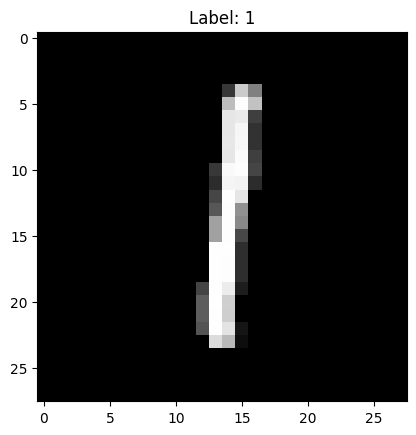

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5500], cmap='gray')
plt.title(f"Label: {y_train[5500]}")
plt.show()


In [5]:
import numpy as np

# Extract the image and label
image = X_train[3]
label = y_train[3]

# Print all 28x28 pixel values neatly
np.set_printoptions(threshold=np.inf, linewidth=120)
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 21

In [6]:

# CNN expects 4D input → (num_samples, height, width, channels).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [8]:
print("After scaling (rows 10–19 of image 0):")
print(X_train[0, 10:20, :, 0])


After scaling (rows 10–19 of image 0):
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.05490196
  0.00392157 0.60392157 0.99215686 0.35294118 0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.54509804 0.99215686 0.74509804 0.00784314 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.74509804 0.99215686 0.2745098  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [11]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 53s 61ms/step - loss: 0.2632 - accuracy: 0.9206 - val_loss: 0.0507 - val_accuracy: 0.9857
Epoch 2/5
844/844 [==============================] - 68s 81ms/step - loss: 0.0874 - accuracy: 0.9736 - val_loss: 0.0401 - val_accuracy: 0.9888
Epoch 3/5
844/844 [==============================] - 52s 62ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0325 - val_accuracy: 0.9908
Epoch 4/5
844/844 [==============================] - 52s 62ms/step - loss: 0.0525 - accuracy: 0.9850 - val_loss: 0.0355 - val_accuracy: 0.9903
Epoch 5/5
844/844 [==============================] - 53s 63ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0327 - val_accuracy: 0.9902


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 [==============================] - 3s 10ms/step - loss: 0.0276 - accuracy: 0.9898
Test Accuracy: 0.989799976348877


In [13]:
model.save('mnist_cnn_model.h5')


e:\Education\ML Learning\Machine Learning - Data Science Notebooks\00 Advanced Project\Computer Vision\Handwritten Digits Recognition\tf_env\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model converted to ONNX format successfully!
1/1 [==============================] - 0s 470ms/step


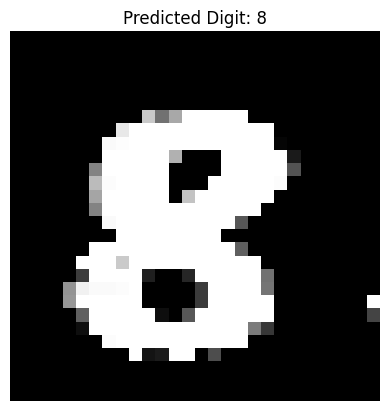

✅ Predicted Digit: 8


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tf2onnx

# Load trained Keras CNN model
model = load_model("mnist_cnn_model.h5")
# Convert and save as ONNX
onnx_model, _ = tf2onnx.convert.from_keras(model)
with open("mnist_cnn_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ Model converted to ONNX format successfully!")
# Path to test image
image_path = "w.png"

# Read image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Optional: invert if background is white (digit dark)
# Check mean brightness — invert only if background > 127
if np.mean(img) > 127:
    _, img_thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
else:
    img_thresh = img

# Resize to 28x28
img_resized = cv2.resize(img_thresh, (28, 28))

# Normalize and reshape to match training data
img_scaled = img_resized / 255.0
img_ready = img_scaled.reshape(1, 28, 28, 1)

# Predict
pred = model.predict(img_ready)
digit = np.argmax(pred)

# Show result
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.axis('off')
plt.show()

print(f"✅ Predicted Digit: {digit}")



